In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = r'C:\Users\Lenovo\Documents\KULIAH\semester 6\Analisis Sinyal Biomedis\all feature & labelling.csv'
df = pd.read_csv(file_path, header=None, sep =";")
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,:3].copy()
y = df.iloc[:,3].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(24297, 3)
(24297,)


In [4]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [5]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# Dense layers
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_dnn = tf.keras.Model(inputs, outputs)
model_dnn.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160  

In [6]:
model_dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
batch_size = 32
epochs = 100

history = model_dnn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
456/456 [==============================] - 9s 11ms/step - loss: 0.5639 - accuracy: 0.7588 - val_loss: 0.4558 - val_accuracy: 0.8266 - lr: 0.0010
Epoch 2/100
456/456 [==============================] - 4s 8ms/step - loss: 0.4352 - accuracy: 0.8385 - val_loss: 0.4343 - val_accuracy: 0.8285 - lr: 0.0010
Epoch 3/100
456/456 [==============================] - 4s 8ms/step - loss: 0.4027 - accuracy: 0.8501 - val_loss: 0.4150 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 4/100
456/456 [==============================] - 3s 8ms/step - loss: 0.3858 - accuracy: 0.8572 - val_loss: 0.3610 - val_accuracy: 0.8595 - lr: 0.0010
Epoch 5/100
456/456 [==============================] - 6s 14ms/step - loss: 0.3680 - accuracy: 0.8620 - val_loss: 0.4551 - val_accuracy: 0.8480 - lr: 0.0010
Epoch 6/100
456/456 [==============================] - 3s 7ms/step - loss: 0.3624 - accuracy: 0.8634 - val_loss: 0.3779 - val_accuracy: 0.8532 - lr: 0.0010
Epoch 7/100
456/456 [==============================] - 3s 8ms/

190/190 [==============================] - 1s 4ms/step


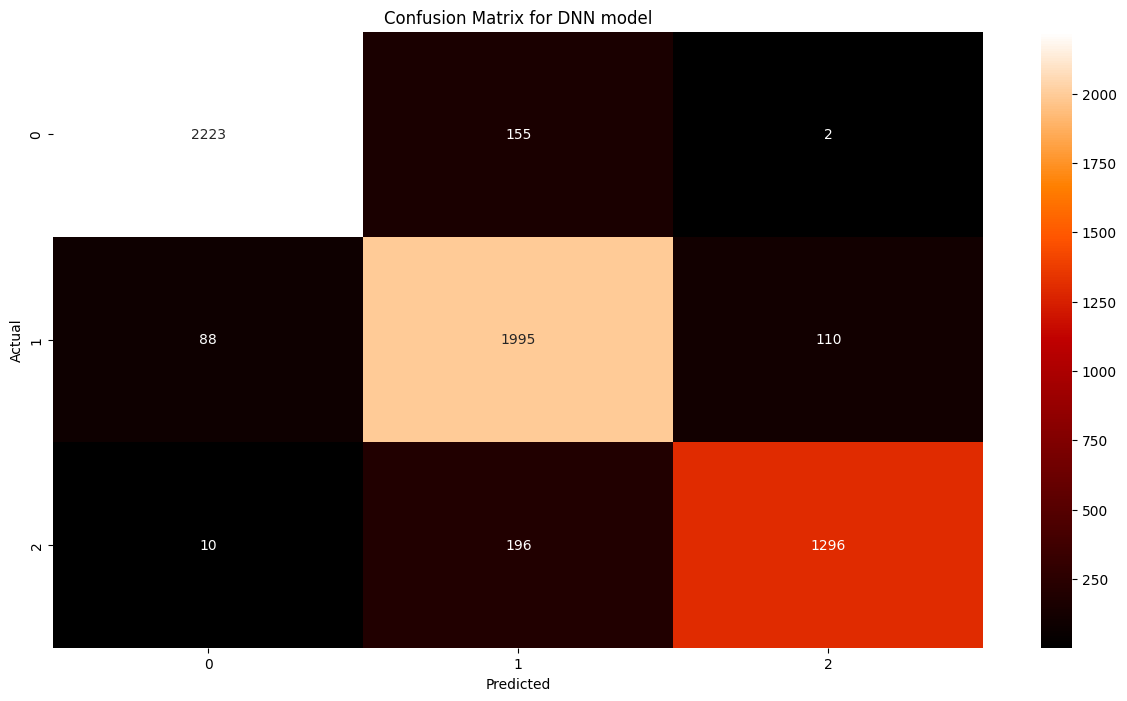

In [9]:
# Confusion matrix for DNN model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_true = np.array(y_test)
y_pred_dnn = np.argmax(model_dnn.predict(x_test), axis=-1)
cm_dnn = confusion_matrix(y_true, y_pred_dnn)
plt.figure(figsize = (15,8))
sns.heatmap(cm_dnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DNN model")
plt.show()